# Uber DataFrame
- This notebook combines multiple Market indicators into one massive DataFrame
- That DataFrame will be used for Machine Learning

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Fetch-Data" data-toc-modified-id="Fetch-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fetch Data</a></span></li><li><span><a href="#Visualize-the-dependencies" data-toc-modified-id="Visualize-the-dependencies-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualize the dependencies</a></span><ul class="toc-item"><li><span><a href="#Preview-Content" data-toc-modified-id="Preview-Content-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preview Content</a></span></li></ul></li></ul></div>

## Set Up

In [1]:
dir="./Data/processed/"

dataset_file_name = "uber.csv"

file1 = "^DJI.csv"
file2 = "united-states.ism-manufacturing-employment.csv"


include("MarketIndicators.jl") 
println()

## Fetch Data

In [2]:
df1 = fetch_dataset( file1 , "yyyy-mm-dd", dir )

df1_min_day = minimum(df1[:,1])
println("df1_min_day: ", df1_min_day)

df1_max_day = maximum(df1[:,1])
println("df1_max_day: ", df1_max_day)

using Statistics
describe(df1)

./Data/processed/^DJI.csv
df1_min_day: 724670
df1_max_day: 737735


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Day,731202.0,724670,731202.0,737735,,,Int64
2,Date,,1985-01-29,,2020-11-06,13066,,Date
3,Value,-46.5783,-128.0,-47.0,127.0,,,Float64
4,Original,10292.9,1251.21,10198.5,29568.6,,,Float64
5,Avg005,-46.5765,-128.0,-47.4,126.4,,,Float64
6,Avg030,-46.5606,-128.0,-47.13,123.63,,,Float64
7,Avg090,-46.5292,-127.97,-46.64,119.87,,,Float64
8,Avg180,-46.4564,-127.64,-46.78,112.75,,,Float64
9,Avg365,-46.226,-126.98,-46.84,105.19,,,Float64


In [3]:
df2 = fetch_dataset( file2 , "yyyy-mm-dd", dir )


df2_min_day = minimum(df2[:,1])
println("df2_min_day: ", df2_min_day)

df2_max_day = maximum(df2[:,1])
println("df2_max_day: ", df2_max_day)


using Statistics
describe(df2)

./Data/processed/united-states.ism-manufacturing-employment.csv
df2_min_day: 735173
df2_max_day: 737731


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Day,736452.0,735173,736452.0,737731,,,Int64
2,Date,,2013-11-01,,2020-11-02,2559,,Date
3,Value,64.2564,-128.0,69.0,127.0,,,Float64
4,Original,52.2247,27.5,52.8,60.3,,,Float64
5,Avg005,64.1569,-128.0,69.0,127.0,,,Float64
6,Avg030,63.5885,-128.0,70.33,127.0,,,Float64
7,Avg090,62.2339,-79.27,72.78,124.68,,,Float64
8,Avg180,61.0588,-36.78,70.09,114.71,,,Float64
9,Avg365,59.2222,-8.1,65.89,106.14,,,Float64


In [4]:
uber_min_day = df1_min_day
if df1_min_day < df2_min_day
    uber_min_day = df2_min_day
end
println("uber_min_day: ", uber_min_day)



uber_min_day: 735173


In [5]:
uber_min_id = find_day(df1, uber_min_day)
# 10504 true

10504

In [6]:
uber_max_day = df1_max_day
if df1_max_day > df2_max_day
    uber_max_day = df2_max_day
end
println("uber_max_day: ", uber_max_day)

uber_max_day: 737731


In [7]:
uber_max_id = find_day(df1, uber_max_day)
# 13062 true

13062

In [8]:
rows_range = uber_min_id:uber_max_id

10504:13062

In [9]:
using DataFrames
uber_df = DataFrame( Day                  = df1[rows_range,1], 
                     Date                 = df1[rows_range,2], 
                     DJIA_Value           = df1[rows_range,3], 
                     DJIA_Original        = df1[rows_range,4], 
                     DJIA_Avg005          = df1[rows_range,5], 
                     DJIA_Avg030          = df1[rows_range,6], 
                     DJIA_Avg090          = df1[rows_range,7], 
                     DJIA_Avg180          = df1[rows_range,8], 
                     DJIA_Avg365          = df1[rows_range,9], 
                     ISM_MFC_EMP_Value    = df2[:,3],
                     ISM_MFC_EMP_Original = df2[:,4], 
                     ISM_MFC_EMP_Avg005   = df2[:,5], 
                     ISM_MFC_EMP_Avg030   = df2[:,6], 
                     ISM_MFC_EMP_Avg090   = df2[:,7], 
                     ISM_MFC_EMP_Avg180   = df2[:,8], 
                     ISM_MFC_EMP_Avg365   = df2[:,9]
                   )

using Statistics
describe(uber_df)

,variable,mean,min,median,max,nunique,nmissing
,Symbol,Union…,Any,Union…,Any,Union…,Nothing
1,Day,736452.0,735173,736452.0,737731,,
2,Date,,2013-11-01,,2020-11-02,2559,
3,DJIA_Value,54.7952,0.0,50.0,127.0,,
4,DJIA_Original,21550.9,15478.2,20972.7,29568.6,,
5,DJIA_Avg005,54.7168,1.4,49.4,126.4,,
6,DJIA_Avg030,54.1615,-0.9,48.8,123.63,,
7,DJIA_Avg090,52.8022,-1.52,47.4,119.87,,
8,DJIA_Avg180,50.9165,-1.5,42.17,112.75,,
9,DJIA_Avg365,47.2671,-8.06,33.24,105.19,,


## Visualize the dependencies

In [10]:
columns = preview_data(uber_df, 3)

3×16 DataFrame
│ Row │ Day    │ Date       │ DJIA_Value │ DJIA_Original │ DJIA_Avg005 │
│     │ Int64  │ Date       │ Float64    │ Float64       │ Float64     │
├─────┼────────┼────────────┼────────────┼───────────────┼─────────────┤
│ 1   │ 735173 │ 2013-11-01 │ 2.0        │ 15649.4       │ 1.8         │
│ 2   │ 736026 │ 2016-03-03 │ 13.0       │ 16944.3       │ 12.4        │
│ 3   │ 736879 │ 2018-07-04 │ 81.0       │ 24444.9       │ 80.8        │

│ Row │ DJIA_Avg030 │ DJIA_Avg090 │ DJIA_Avg180 │ DJIA_Avg365 │
│     │ Float64     │ Float64     │ Float64     │ Float64     │
├─────┼─────────────┼─────────────┼─────────────┼─────────────┤
│ 1   │ -0.9        │ -1.52       │ -1.5        │ -8.06       │
│ 2   │ 8.87        │ 12.38       │ 14.2        │ 17.9        │
│ 3   │ 84.6        │ 83.21       │ 85.77       │ 76.34       │

│ Row │ ISM_MFC_EMP_Value │ ISM_MFC_EMP_Original │ ISM_MFC_EMP_Avg005 │
│     │ Float64           │ Float64              │ Float64            │
├─────┼──────────

16-element Array{Symbol,1}:
 :Day
 :Date
 :DJIA_Value
 :DJIA_Original
 :DJIA_Avg005
 :DJIA_Avg030
 :DJIA_Avg090
 :DJIA_Avg180
 :DJIA_Avg365
 :ISM_MFC_EMP_Value
 :ISM_MFC_EMP_Original
 :ISM_MFC_EMP_Avg005
 :ISM_MFC_EMP_Avg030
 :ISM_MFC_EMP_Avg090
 :ISM_MFC_EMP_Avg180
 :ISM_MFC_EMP_Avg365

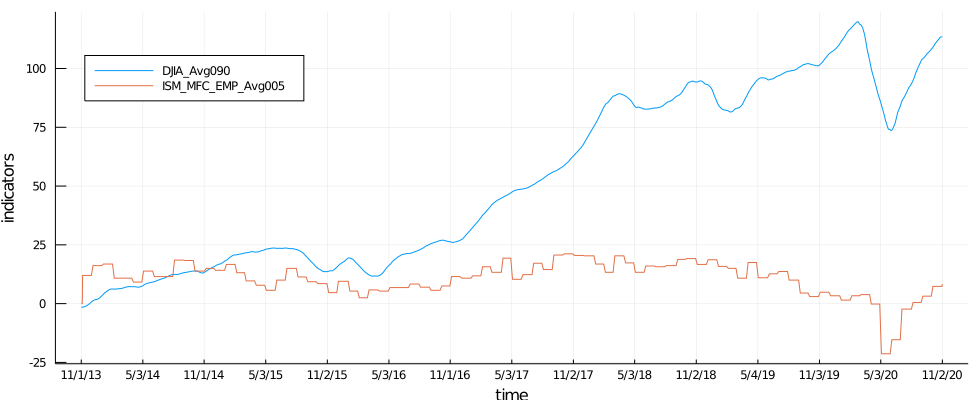

In [54]:
using Plots

record_count = size(uber_df)[1]
rows = 1:record_count
dates = format_dates( uber_df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  uber_df[rows,7] uber_df[rows,12]/6       ], # y-axis
    label    = [       columns[7]      columns[12]    "" ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

### Preview Content

In [12]:
save_dataset(uber_df, dataset_file_name );